In [8]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [9]:
data = pd.read_csv(r"C:\Users\Jason Liu\Desktop\InsightTeam2020\Motor_Vehicle_Collisions_-_Crashes.csv")
print(data.dtypes)
print(data.shape)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [10]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMTIME
0,11/26/2015,11:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3342409,PASSENGER VEHICLE,VAN,NaN,NaN,NaN,11.92
1,4/4/2020,21:07,NaN,NaN,NaN,NaN,NaN,BELT PARKWAY RAMP,NaN,NaN,...,NaN,NaN,NaN,4307578,Sedan,NaN,NaN,NaN,NaN,21.12
2,4/3/2020,23:05,NaN,NaN,NaN,NaN,NaN,VANWYCK EXPRESSWAY,LIBERTY AVENUE,NaN,...,NaN,NaN,NaN,4307510,Sedan,Pick-up Truck,NaN,NaN,NaN,23.08
3,5/3/2016,7:47,BROOKLYN,11221.0,NaN,NaN,NaN,DE KALB AVENUE,LEWIS AVENUE,NaN,...,NaN,NaN,NaN,3435102,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,7.78
4,4/1/2020,7:56,NaN,NaN,NaN,NaN,NaN,WILLIAMSBURG BRIDGE INNER ROADWA,NaN,NaN,...,NaN,NaN,NaN,4305034,Sedan,NaN,NaN,NaN,NaN,7.93


In [11]:
#data=data[['LATITUDE','LONGITUDE','ON STREET NAME','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2']]
print(data['LATITUDE'].isna().sum())
print(data['LONGITUDE'].isna().sum())
print((data['LATITUDE']==0).sum())
print((data['LONGITUDE']==0).sum())

103076
103076
1168
1168


In [12]:
import geopy
import geocoder
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="user")
location = geolocator.geocode("Flatbush Avenue NYC")
print(location.address)
print(location.latitude,location.longitude)

Flatbush Avenue, Gerritsen, Brooklyn, Kings County, New York, 11234, United States of America
40.5983056 -73.9098775


In [13]:
data['ON STREET NAME'] = data['ON STREET NAME']+' NYC'
data.head(10)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMTIME
0,11/26/2015,11:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3342409,PASSENGER VEHICLE,VAN,NaN,NaN,NaN,11.92
1,4/4/2020,21:07,NaN,NaN,NaN,NaN,NaN,BELT PARKWAY RAMP NYC,NaN,NaN,...,NaN,NaN,NaN,4307578,Sedan,NaN,NaN,NaN,NaN,21.12
2,4/3/2020,23:05,NaN,NaN,NaN,NaN,NaN,VANWYCK EXPRESSWAY NYC,LIBERTY AVENUE,NaN,...,NaN,NaN,NaN,4307510,Sedan,Pick-up Truck,NaN,NaN,NaN,23.08
3,5/3/2016,7:47,BROOKLYN,11221.0,NaN,NaN,NaN,DE KALB AVENUE NYC,LEWIS AVENUE,NaN,...,NaN,NaN,NaN,3435102,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,7.78
4,4/1/2020,7:56,NaN,NaN,NaN,NaN,NaN,WILLIAMSBURG BRIDGE INNER ROADWA NYC,NaN,NaN,...,NaN,NaN,NaN,4305034,Sedan,NaN,NaN,NaN,NaN,7.93
5,3/29/2020,7:16,NaN,NaN,NaN,NaN,NaN,BELT PARKWAY RAMP NYC,NaN,NaN,...,NaN,NaN,NaN,4307777,Box Truck,Box Truck,NaN,NaN,NaN,7.27
6,3/28/2020,20:40,NaN,NaN,NaN,NaN,NaN,CONNER STREET NYC,TILLOTSON AVENUE,NaN,...,NaN,NaN,NaN,4304536,Sedan,NaN,NaN,NaN,NaN,20.67
7,3/28/2020,9:40,QUEENS,11420.0,40.678295,-73.808075,POINT (-73.808075 40.678295),132 STREET NYC,116 AVENUE,NaN,...,NaN,NaN,NaN,4304582,Sedan,NaN,NaN,NaN,NaN,9.67
8,3/27/2020,6:48,NaN,NaN,NaN,NaN,NaN,ROCKAWAY BOULEVARD NYC,BROOKVILLE BOULEVARD,NaN,...,NaN,NaN,NaN,4304114,Sedan,Sedan,NaN,NaN,NaN,6.80
9,4/15/2016,17:00,NaN,NaN,NaN,NaN,NaN,"RFK BRIDGE BRONX TOLL PLZ, R/W 2 NYC",NaN,NaN,...,NaN,NaN,NaN,3409945,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,17.00


In [34]:
#created a concatenated list of all 
data = data[['BOROUGH','LONGITUDE','LATITUDE','ON STREET NAME']]
zero_data = data[data['LONGITUDE'].eq(0)]
empty_data = data.loc[data[['LONGITUDE','LATITUDE']].isna().any(axis=1)]
null_data = pd.concat([empty_data,zero_data])
null_data = null_data[null_data['ON STREET NAME'].notna()]
null_data.head(20)
null_data.to_csv(r"C:\Users\Jason Liu\Desktop\InsightTeam2020\addresses.csv", index = False, header = True)


In [68]:
from geopy.exc import GeocoderTimedOut

def geocodelong(address):
    geolocator = Nominatim(user_agent="user")
    location = geolocator.geocode(address)
    try:
        return location.longitude
    except GeocoderTimedOut:
        return do_geocode(address)
    except AttributeError:
        return 0

def geocodelat(address):
    geolocator = Nominatim(user_agent="user")
    location = geolocator.geocode(address)
    try:
        return location.latitude
    except GeocoderTimedOut:
        return do_geocode(address)
    except AttributeError:
        return 0
        
def getlong(address):
    geolocator = Nominatim(user_agent="user")
    location = geolocator.geocode(address)
    try:
        return location.longitude
    except AttributeError:
        return 0
def getlat(address):
    geolocator = Nominatim(user_agent="user")
    location = geolocator.geocode(address)
    try:
        return location.latitude
    except AttributeError:
        return 0
def getaddress(address):
    geolocator = Nominatim(user_agent="user")
    location = geolocator.geocode(address)
    try:
        return location.address
    except AttributeError:
        return 0
geocodelong('91 AVENUE NYC')

-73.9854770212766

In [71]:
#getlong(null_data['ON STREET NAME'].iloc[9]) 
#-73.724982
#null_data['N_LONG'] = getlong(null_data['ON STREET NAME'])
#null_data
null_data['N_LONG'] = 0
null_data['N_LAT'] = 0
for row in range(0,50):
    null_data['N_LONG'].iloc[row] = geocodelong(null_data['ON STREET NAME'].iloc[row])
    null_data['N_LAT'].iloc[row] = geocodelat(null_data['ON STREET NAME'].iloc[row])
null_data.head(20)
#null_data.apply(getlong(null_data['LONGITUDE']),axis=1)

GeocoderTimedOut: Service timed out

C:\Users\Jason Liu\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Jason Liu\Anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Jason Liu\Anaconda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
C:\Users\Jason Liu\Anaconda3\lib\site-packages\matplotlib\contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


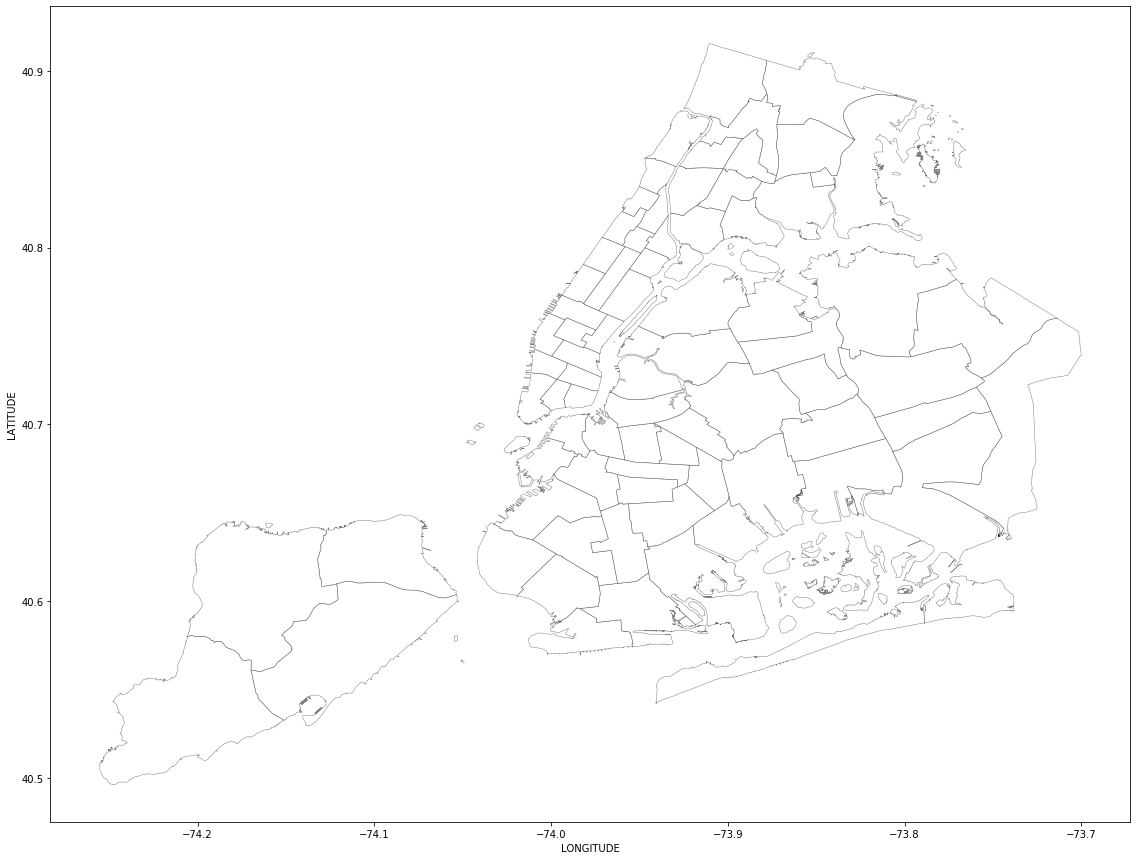

In [26]:
url = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=GeoJSON' 
df_nyc = gpd.read_file(url)
ny_map = df_nyc.plot(linewidth=0.5, color='White', edgecolor = 'Black', figsize = (20,15), alpha=0.5)

#this calculation takes hella long, think about subsampling the data, also the heatmap didn't work even when testing with 20 points
data_test = null_data.head(20)
sns.kdeplot(
    data_test.LONGITUDE, data_test.LATITUDE,
    gridsize = 100,
    cmap = plt.cm.Reds,
    shade = True,
    shade_lowest = False,
    n_levels = 10,
    alpha = .5,
    ax = ny_map)